In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# Importing data
data_train = pd.read_csv("train.csv")
data_train.head()
data_train.shape

(14999, 9)

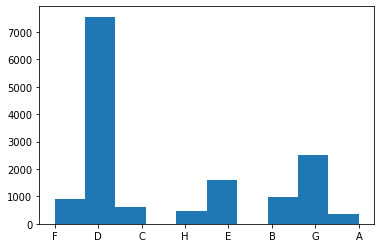

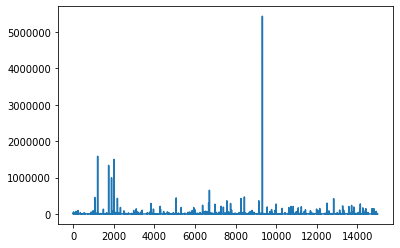

In [3]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

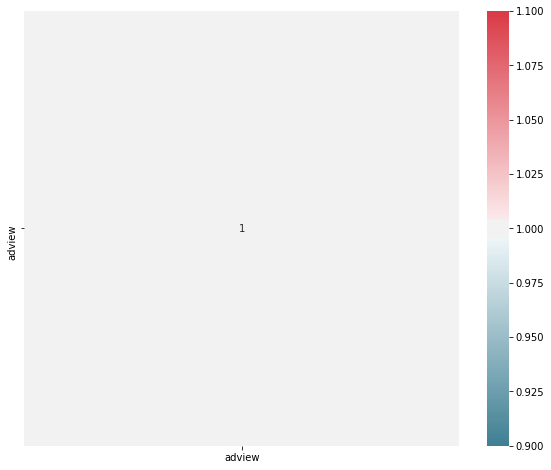

In [4]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [5]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [6]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

# Endoding features like Category, Duration, Vidid

from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [7]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    
    for i in y:
        if i not in P:
            mm = mm + i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h ==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s ==''):
        s ='00'
    bp = h+':'+m+':'+s
    return bp
    
train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [8]:
# Split Data

Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

# Normalise Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.1739096800320488

In [9]:
# Evaluation Metrics

from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [10]:
# Linear Regression

from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [11]:
# Support Vector Regressor

from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\Aastha singh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [12]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2613.97575136612
Mean Squared Error: 886170650.2346312
Root Mean Squared Error: 29768.61854763555


In [13]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\Aastha singh\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Mean Absolute Error: 3311.973698918215
Mean Squared Error: 611969334.4970562
Root Mean Squared Error: 24738.013956198185


In [14]:
# Artificial Neural Network

import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(6, activation="relu",
    input_shape=X_train.shape[1:]),
    Dense(6,activation="relu"),Dense(1)])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Using TensorFlow backend.
C:\Users\Aastha singh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aastha singh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aastha singh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aastha singh\anaconda3\lib\site-packages\tensorflo


Epoch 1/100
11708/11708 [==============================] - 1s 89us/step - loss: 767407481.2940 - mean_squared_error: 767407360.0000
Epoch 2/100
11708/11708 [==============================] - 1s 64us/step - loss: 767400491.9348 - mean_squared_error: 767400256.0000
Epoch 3/100
11708/11708 [==============================] - 1s 63us/step - loss: 767384750.0778 - mean_squared_error: 767384768.0000
Epoch 4/100
11708/11708 [==============================] - 1s 70us/step - loss: 767358499.0785 - mean_squared_error: 767358656.0000
Epoch 5/100
11708/11708 [==============================] - 1s 66us/step - loss: 767324002.2735 - mean_squared_error: 767323264.0000
Epoch 6/100
11708/11708 [==============================] - 1s 62us/step - loss: 767276212.9804 - mean_squared_error: 767275712.0000
Epoch 7/100
11708/11708 [==============================] - 1s 69us/step - loss: 767209867.0090 - mean_squared_error: 767209600.0000
Epoch 8/100
11708/11708 [==============================] - 1s 59us/step - l

11708/11708 [==============================] - 1s 67us/step - loss: 763883876.5901 - mean_squared_error: 763884032.0000
Epoch 61/100
11708/11708 [==============================] - 1s 61us/step - loss: 763878541.3675 - mean_squared_error: 763878720.0000
Epoch 62/100
11708/11708 [==============================] - 1s 60us/step - loss: 763869858.4737 - mean_squared_error: 763869824.0000
Epoch 63/100
11708/11708 [==============================] - 1s 65us/step - loss: 763861754.6870 - mean_squared_error: 763861376.0000
Epoch 64/100
11708/11708 [==============================] - 1s 63us/step - loss: 763854568.1580 - mean_squared_error: 763854272.0000
Epoch 65/100
11708/11708 [==============================] - 1s 65us/step - loss: 763849601.7949 - mean_squared_error: 763849792.0000
Epoch 66/100
11708/11708 [==============================] - 1s 58us/step - loss: 763842352.2403 - mean_squared_error: 763842112.0000
Epoch 67/100
11708/11708 [==============================] - 1s 71us/step - loss: 7

## Mean Absolute Errors for different Models 

# Linear Regression
Mean Absolute Error: 3707.3780058245347

# Support Vector Regressor
Mean Absolute Error: 3707.3780058245347
    
# Decision Tree Regressor
Mean Absolute Error: 2724.370901639344
    
# Random Forest Regressor
Mean Absolute Error: 3258.896997886992
    
# Artificial Neural Network
Mean Absolute Error: 3201.072157689782

We get Least Error in #Decision Tree Regressor

In [15]:
#Decision Tree Regressor

# Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

dtc = DecisionTreeRegressor()

# fit
dtc.fit(X_train, y_train)

# predict
y_pred = dtc.predict(X_test)

# f1 score
score = f1_score(y_pred, y_test,pos_label='positive',average='micro')

print ("Decision Tree F1 score: {:.2f}".format(score))

Mean Absolute Error: 2647.438183060109
Mean Squared Error: 885615704.9395492
Root Mean Squared Error: 29759.296109611685
Decision Tree F1 score: 0.24


C:\Users\Aastha singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [16]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24146174863387979


In [18]:
data_test = pd.read_csv("test.csv")
data_test.shape

(8764, 8)

In [19]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [20]:
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
iris = datasets.load_iris()
features = iris.data
target = iris.target
print(features)
print(target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [21]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_test, y_test)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
#Predicting the Test Set Results
y_pred = decision_tree.predict(X_test)              
print(y_pred)

[ 5.  2.  5. ...  1.  2. 11.]


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1228,    0,    0, ...,    0,    0,    0],
       [   0,  437,    0, ...,    0,    0,    0],
       [   0,    0,  231, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    1,    0,    0],
       [   0,    0,    0, ...,    0,    1,    0],
       [   0,    0,    0, ...,    0,    0,    1]], dtype=int64)

In [39]:
from sklearn import tree
X = iris.data
y = iris.target
model = dtc.fit(X, y)

In [40]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



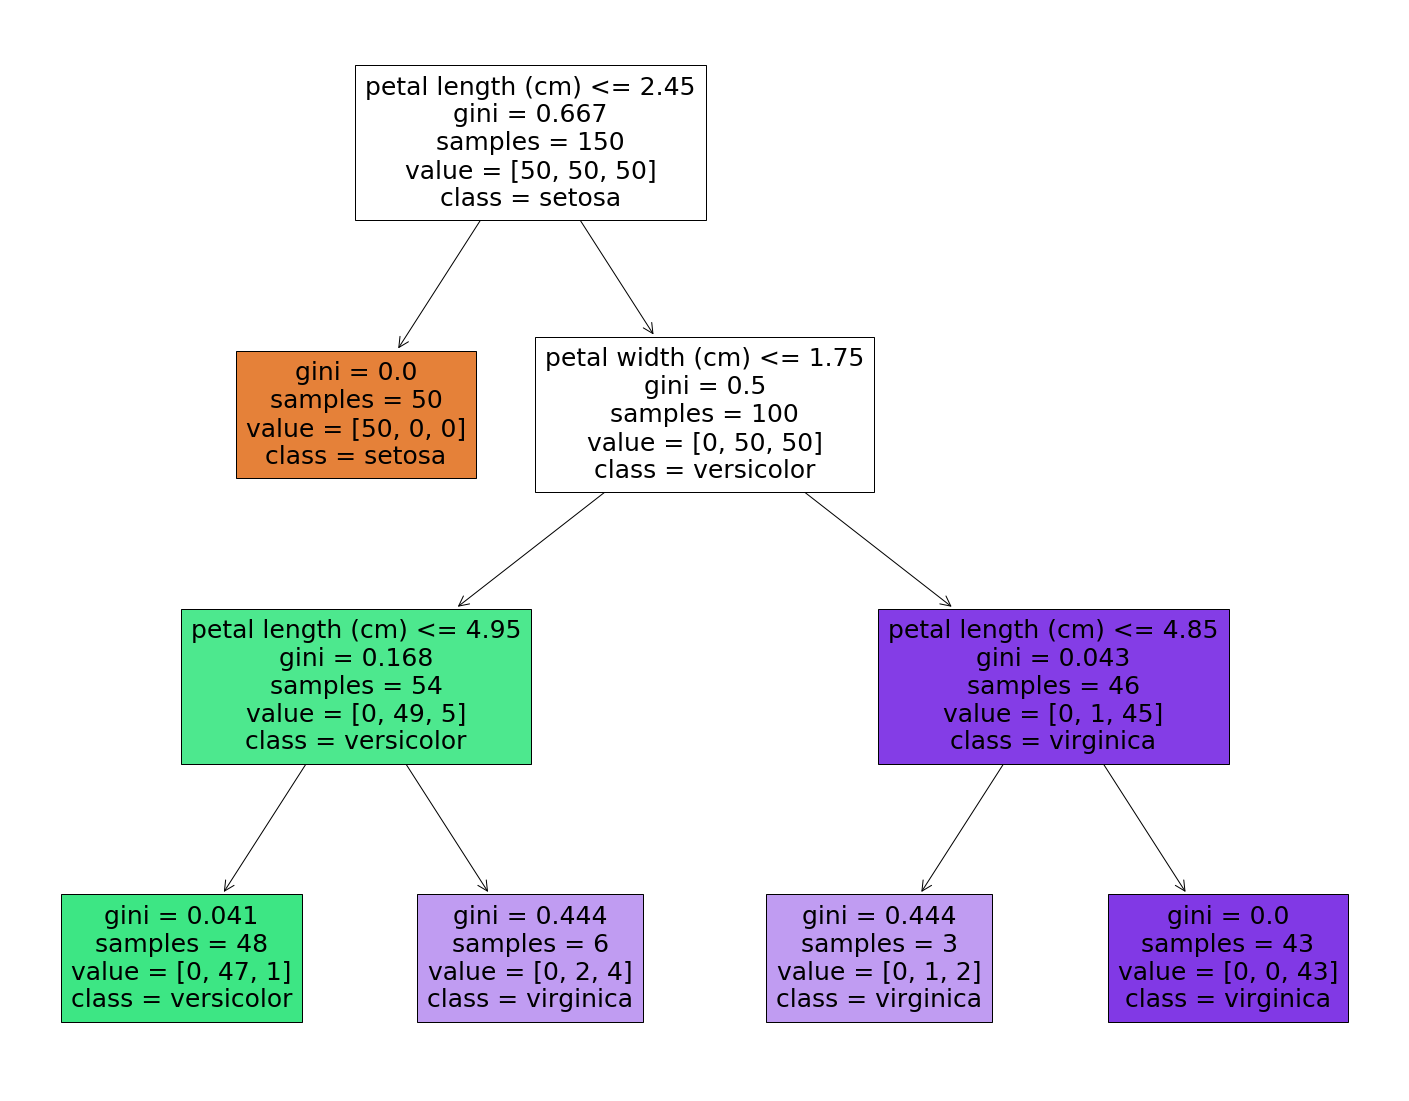

In [41]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [47]:
fig.savefig("decistion_tree.png")

In [61]:
prediction = decision_tree.predict(X_test)
print(prediction)

[ 5.  2.  5. ...  1.  2. 11.]


In [76]:
regressor = joblib.load("decisiontree_youtubeadview.pkl")
prediction = decision_tree.predict(X_test)

In [78]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')